1. Mother has four properties: wealth [1-4], education [1-3], age [continuous], number of children [continuous], (gestational age, ANC, facility, health)
2. Mother will choose whether to go to ANC. (predisposition ANC)
3. Mother also will decide based on two properties of the hospital whether to deliver at the hospital: quality of care of facility, proximity to the facility
4. Mother's final health outcome will be decided on type of facility, current health

In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, patches
import scipy.stats as ss

In [111]:
# read file of data with columns 1-4 [Mother]: wealth, education, age, number of children
# simulate for health, gestational age, predisposition for ANC 
df = pd.read_excel("SDR_Mother.xlsx")

wealth = df['Wealth']
education = df['Education']
age = df['Age']
no_children = df['No_children']

In [112]:
class Mother:
    def __init__(self, wealth, education, age, no_children):
        """initiate characteristics of Mother agent"""
        self._wealth = wealth
        self._education = education
        self._age = age
        self._no_children = no_children

        self._gest_age = -(np.int(np.random.randint(1, 25, 1)))
        self._health = 0.4 + 0.2*(np.random.uniform(-1,1,1))
        self._predisp_ANC = 0.4 + 0.2*(np.random.uniform(-1,1,1))

        self._delivery = None
        self._facility = None
        self._anc = 0

    def visit_anc(self):
        """go to ANC if predisposition for it, changes health"""
        anc_treatment = 0.1
        if self._predisp_ANC > np.random.uniform(0,1,1):
            self._health = self._health + (anc_treatment*self._health*(1-self._health))
            self._anc += 1

    def choose_delivery(self, quality, proximity):
        """delivery facility depending on where one goes for care and health status"""
        predisp_hospital = 1/(1+np.exp(-1*(0.02*self._wealth + 0.02*self._education + 0.02*self._age + 0.05*self._no_children + 0.1*self._health + 0.1*quality + 0.1*proximity)))
        if np.random.binomial(1, predisp_hospital) == 1:
            self._facility = 2
            low_quality_effect = 1 - quality
            self._prob_healthy = 1 - (0.05 + 0.9*low_quality_effect)
        else:
            self._facility = 1
            self._prob_healthy = 0.2

    def deliver(self):
        """delivery outcome"""
        if (self._health < np.random.uniform(0,1,1)) & (self._health > np.random.uniform(0,1,1)):
            self._delivery = -1
        else:
            self._delivery = 1
        
    def increase_age(self, quality, proximity):
        """increase gestational age (step)"""
        self._gest_age = self._gest_age + 1
        if (self._gest_age > 0) & (self._gest_age < 9):
            self.visit_anc()
        elif self._gest_age == 9:
            self.choose_delivery(quality, proximity)
            self.deliver()

In [113]:
no_mothers = len(df['Age'])
no_months = 25

quality = 0.7
proximity = 0.8
mothers = []
for mother in range(0,no_mothers):
    mothers.append(Mother(wealth[mother], education[mother], age[mother], no_children[mother]))

In [114]:
# run model
anc_t = {}
health_t = {}
gest_age_t = {}

deliveries = {}
facilities = {}

for t in range(1, no_months):
    gest_age = []
    health = []
    anc = []
    delivery = []
    facility = []
    for mother in mothers:
        mother.increase_age(quality, proximity)

        gest_age.append(mother._gest_age) # done 
        health.append(np.float(mother._health)) # done
        anc.append(mother._anc) # done
        delivery.append(mother._delivery) 
        facility.append(mother._facility)

    gest_age_t[t] = gest_age
    health_t[t] = health
    anc_t[t] = anc    
    deliveries[t] = delivery
    facilities[t] = facility

gest_age_t = pd.DataFrame.from_dict(gest_age_t)
health_t = pd.DataFrame.from_dict(health_t)
anc_t = pd.DataFrame.from_dict(anc_t)
deliveries = pd.DataFrame.from_dict(deliveries)
facilities = pd.DataFrame.from_dict(facilities)

Text(0.5, 1.0, 'Health outcome distribution')

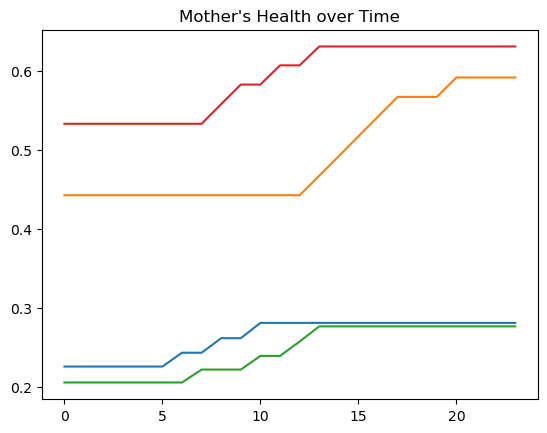

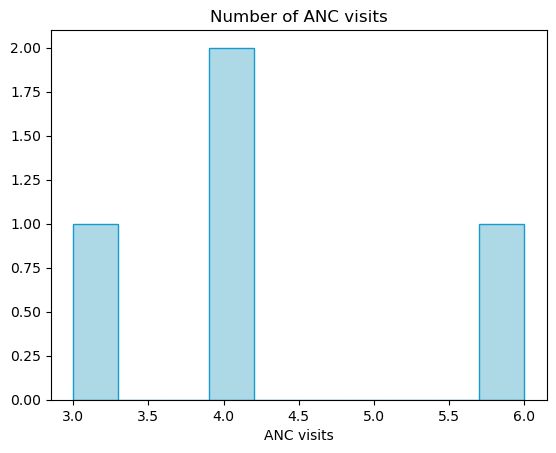

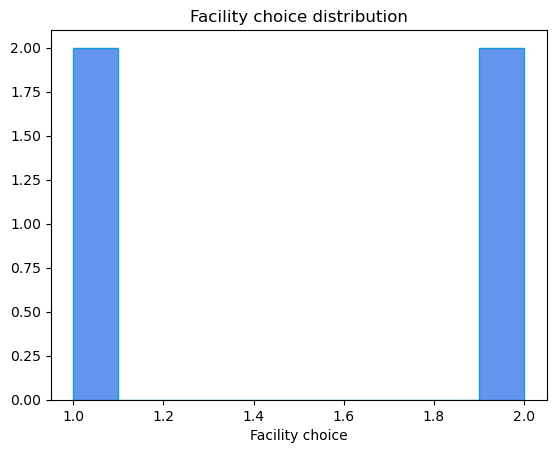

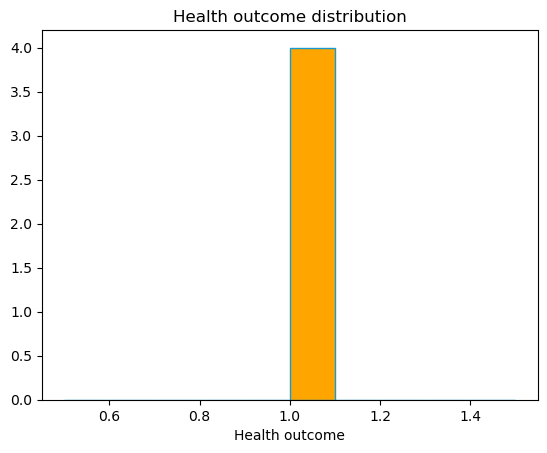

In [131]:
plt.figure()
for i in range(0, no_mothers):
    plt.plot(range(0, 24), health_t.iloc[i,:])
plt.title("Mother's Health over Time")

plt.figure()
plt.hist(anc_t[24], align = 'mid', facecolor = 'lightblue', edgecolor='#169acf')
plt.xlabel('ANC visits')
plt.title('Number of ANC visits')

plt.figure()
plt.hist(facilities[24], align = 'mid', facecolor = 'cornflowerblue', edgecolor='#169acf')
plt.xlabel('Facility choice')
plt.title('Facility choice distribution')

plt.figure()
plt.hist(deliveries[24], align = 'mid', facecolor = 'orange', edgecolor='#169acf')
plt.xlabel('Health outcome')
plt.title('Health outcome distribution')